# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [394]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# Load the dataset


In [395]:
df = pd.read_csv('Copy of Traffic_Jams.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [396]:
#Summary Statistics: Obtain summary statistics for the dataset to understand the
#central tendencies and dispersion of numerical features.describe()
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [397]:
df.columns.tolist() # show the list of columns vertical

['Time',
 'Date',
 'Day of the week',
 'CarCount',
 'BikeCount',
 'BusCount',
 'TruckCount',
 'Total',
 'Traffic Situation']

In [398]:
df.info() # shows datatype and list of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


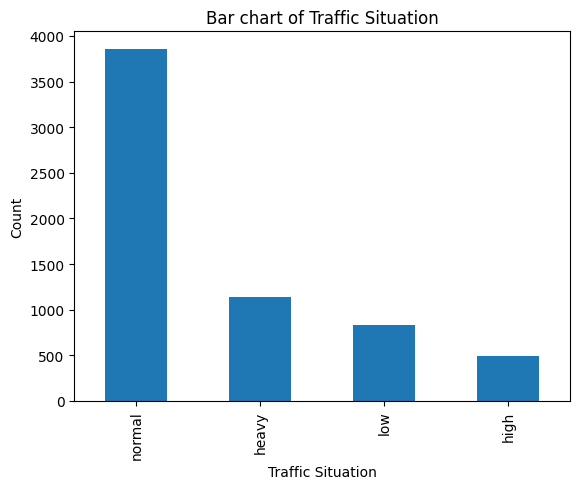

In [399]:
#Distribution of the Target Variable: Analyze the distribution of the target
#variable Traffic Situation to understand the class balance.
# Since it is categrical, we use bar chart
df['Traffic Situation'].value_counts().plot(kind='bar')
plt.title('Bar chart of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

# the high class in this chart is normal then heavy.
#

In [400]:
#Correlation Analysis: Analyze correlations between features.

numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
numerical_columns
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.010507,-0.001985,-0.006166,0.021137,-0.006041
CarCount,-0.010507,1.000000,0.705941,0.664491,-0.583984,0.971386
BikeCount,-0.001985,0.705941,1.000000,0.581289,-0.585670,0.779261
BusCount,-0.006166,0.664491,0.581289,1.000000,-0.533847,0.763496
TruckCount,0.021137,-0.583984,-0.585670,-0.533847,1.000000,-0.508179
Total,-0.006041,0.971386,0.779261,0.763496,-0.508179,1.000000


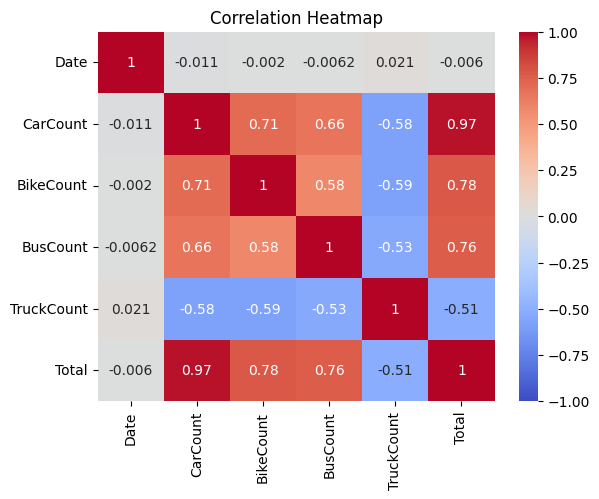

In [401]:
# Visulize heatmap

sns.heatmap(correlation_matrix,vmin=-1,vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# As can we see that there is high correlation between Total number of vehicals
# and Bike countand Car count. This for me indicating that the majority of the traffic analysis are cars rather than
# Bike and bus. However, there is negative correlation between the total and the Truck count

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [402]:
df.isnull().sum()
# There are no missing values so we don't need to do the handing

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [403]:
# Encode Categorical Variables: Convert categorical variables into numerical
# representations. This can be done using techniques such as one-hot encoding and lable-encoder.
# we will use label encoder for Time and Day of the week
label_encoder = LabelEncoder()
df['Time'] = label_encoder.fit_transform(df['Time'])
df['Day of the week'] = label_encoder.fit_transform(df['Day of the week'])
df


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,16,10,5,13,2,2,24,41,normal
1,18,10,5,14,1,1,36,52,normal
2,20,10,5,10,2,2,32,46,normal
3,22,10,5,10,2,2,36,50,normal
4,24,10,5,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
6319,4,9,4,26,16,13,16,71,normal
6320,81,9,4,72,25,10,27,134,high
6321,89,9,4,107,13,14,28,162,high
6322,93,9,4,106,18,13,27,164,high


In [404]:
#Encode Categorical Variables
# Label encoder
#le = LabelEncoder()
#for i in df.select_dtypes(include=['object']).columns:
    #df[i] = le.fit_transform(df[[i]])

# For this step I converted all categorical to label encoder, However,
# From above step I kept the target variable not coded because this what we want to predict. We will use classification
# This intitally come when running the model as I can only use it for regression
# I have decided to keep the traffic situation becuse then we will drop it as it will be our target variable

In [405]:
ss = StandardScaler()
for i in df.select_dtypes(exclude=['object']).columns:
    print(i)
    df[i] = ss.fit_transform(df[[i]])


Time
Date
Day of the week
CarCount
BikeCount
BusCount
TruckCount
Total


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               6324 non-null   float64
 1   Date               6324 non-null   float64
 2   Day of the week    6324 non-null   float64
 3   CarCount           6324 non-null   float64
 4   BikeCount          6324 non-null   float64
 5   BusCount           6324 non-null   float64
 6   TruckCount         6324 non-null   float64
 7   Total              6324 non-null   float64
 8   Traffic Situation  6324 non-null   object 
dtypes: float64(8), object(1)
memory usage: 444.8+ KB


In [407]:
df['Time']

,Time
0,-1.137300
1,-1.065529
2,-0.993758
3,-0.921987
4,-0.850216
...,...
6319,-1.567927
6320,1.195260
6321,1.482344
6322,1.625886


In [408]:
df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,3858
heavy,1137
low,834
high,495


In [409]:
# Regarding removing unecessery column, I belive all the coulmns need to be there in the analysis
# However, since we did the labeling, the time column now doesn't make any sense. So I belive, it is the best to drop it
# uncless if I factor the time inot hour, minuties and seconds then I do the scalling might be better.
# Let's for now drop the column. Also the date is also doesn't make sense to keep it

df = df.drop(['Time','Date'], axis=1)
df


,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0.906058,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,normal
1,0.906058,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,normal
2,0.906058,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,normal
3,0.906058,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,normal
4,0.906058,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,normal
...,...,...,...,...,...,...,...
6319,0.408368,-0.865746,0.350849,0.035890,-0.247868,-0.655099,normal
6320,0.408368,0.172545,1.142889,-0.207639,0.777871,0.472996,high
6321,0.408368,0.962549,0.086836,0.117066,0.871120,0.974371,high
6322,0.408368,0.939977,0.526858,0.035890,0.777871,1.010184,high


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

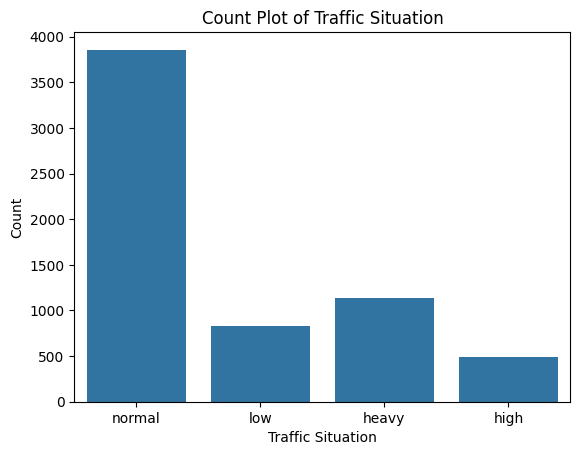

In [410]:

sns.countplot(x='Traffic Situation', data=df)
plt.title('Count Plot of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

# from previous chart above we notice that normal traffic situation is the majority.
# it seems like when the traffic is normal, the traffic increase.

In [411]:

numerical_columns1 = df.select_dtypes(include=['float64']).columns.tolist()
numerical_columns1
correlation_matrix1 = df[numerical_columns1].corr()
correlation_matrix1

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
Day of the week,1.000000,0.013478,-0.087412,0.115630,0.022574,0.022747
CarCount,0.013478,1.000000,0.705941,0.664491,-0.583984,0.971386
BikeCount,-0.087412,0.705941,1.000000,0.581289,-0.585670,0.779261
BusCount,0.115630,0.664491,0.581289,1.000000,-0.533847,0.763496
TruckCount,0.022574,-0.583984,-0.585670,-0.533847,1.000000,-0.508179
Total,0.022747,0.971386,0.779261,0.763496,-0.508179,1.000000


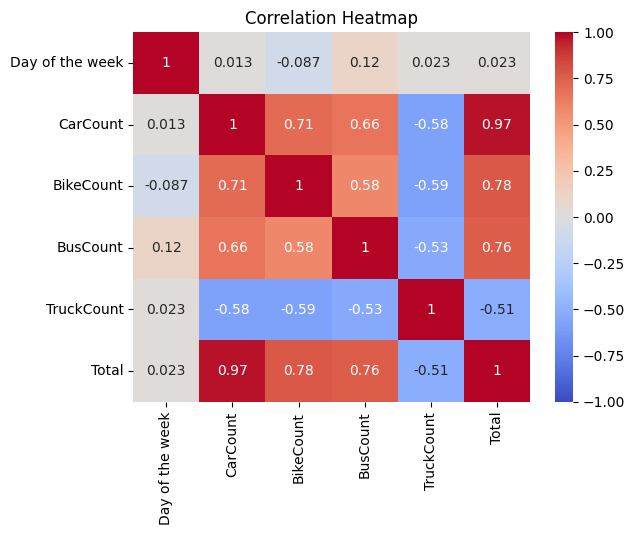

In [412]:
sns.heatmap(correlation_matrix1,vmin=-1,vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# As we previously above plot it we can see the correlation with variables
# There is slightly above 0.5 correlated between the bus count and bike count
# We can notice the traffic of total vheicles and bus counts and highly correlated
# The truck count is negatively correlated with the rest of the variables ( car,bike,bus),
# which indicate that when the number of trucks increase, other vehicles decrease.
# This could be due to trucks taking up more space on the road or
# traveling at slower speeds, which can slow down other traffic.


# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [413]:
# Define Features and Target
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']


In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1132)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

### Evaluate the model performance

In [415]:

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1132)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1132)

In [416]:

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# We have 4 rows becuse target variable have 4 category " Heavy", "Normal", "high","Low"

Accuracy: 0.8946259220231823
Confusion Matrix:
 [[ 350    0    0    0]
 [   0  113    0   45]
 [   0    0  199   61]
 [   1   30   63 1036]]


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [417]:
pip install xgboost

In [418]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the XGBoost model
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Train the model with the encoded target variable
xgboost_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluate the model performance

In [419]:
# Make predictions on the test set
y_pred_encoded = xgboost_model.predict(X_test)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8998946259220232
Confusion Matrix:
 [[ 350    0    0    0]
 [   0  114    0   44]
 [   0    0  204   56]
 [   0   30   60 1040]]


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [420]:

# Define the base models
base_models = [
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier)
]




```
# This is formatted as code
```

### Define meta-learner (LogisticRegression)

In [421]:
# Define meta-learner (LogisticRegression)
meta_learner = LogisticRegression()


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [422]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)

stacking_model.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('random_forest',
                                RandomForestClassifier(random_state=1132)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_po...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [423]:
stacking_pred = stacking_model.predict(X_test)
print(f"This model score is {accuracy_score(stacking_pred, y_test)}")
print(confusion_matrix(y_test, stacking_pred))

This model score is 0.8935721812434141
[[ 350    0    0    0]
 [   0  113    0   45]
 [   0    0  186   74]
 [   0   29   54 1047]]


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting Traffic Situation, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


In [424]:
#-------ANS---------
# Most Important Features:

#Total: This feature is likely the most important as it directly represents
#the number of assessment of the traffic, which is a key factor in determining the traffic situation.

#CarCount: The number of cars is also significant as cars often constitute the majority of people use

#TruckCount: The number of trucks can be important, especially in areas with such as highways.

# I haven't preform any feature engineering as initially thinking to convert time to hours, seconds and min
# I believe these are important factors to determine the traffic starting time. Unfortunatily I haven't done it here.

#-------ANS---------

#Improved Accuracy:
#Ensembles generally outperform single models by combining diverse perspectives.
#Robustness:
#Less susceptible to overfitting and noise in the data.

# Random Forest has an Accuracy: 0.8946259220231823

#xgboost has achived  Accuracy: 0.8998946259220232

#stacking classifier preformed an accuracy of 0.8935721812434141

# Although they are all the same, we consider xgboost is almost %90.
# We can consider it as the highest accuracy, but in this case since they all close
# We can tell that all models preform high accuracy.
# As confusion matrix tells us the TP,TN,FP,FN and since the model predicts it correctly to classify traffic situation

#-------ANS---------

#The accuracy score of all three models were around 90%, indicating that they are all able to
# classify the traffic situation with a high degree of accuracy.

#Strengths:
# High accuracy score indicates good overall performance.
# Ability to identify common traffic situations ("Normal" and "Heavy") effectively. ( from confusion matrix)

# Weaknesses:
# Some difficulty in classifying less common traffic situations ("High" and "Low").

# Answer here: